In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Physics 581 Lab 1
##  Part 2 Random numbers or, are they...?

### Group 1: Rebecca Booth and Nathan Meulenbroek 

## Functions

### Linear Congruential Random Number Generator

In [80]:
def LCM(A=None, C=None, M=None, I=None):
    '''
    Our linear congruential random number generator. 
    
    Returns pseudo random numbers from the sequence I_n+1=(A I_n + C)mod(M)
    
    '''
    
    # The first time LCM is used, A, C, M, and I must be set
    # the values are stored for future function calls in the code below
    if A is not None:
        LCM.A = A
        
    if C is not None:
        LCM.C = C
        
    if M is not None:
        LCM.M = M
    
    if I is not None:
        LCM.I = I
    
    
    # get the next random number in the sequence
    In = (LCM.A*LCM.I + LCM.C)%LCM.M 
    
    # reset I to the current value generated above
    # so that the next time this function is called
    # it will return the next value in the sequence
    LCM.I = In
    
    return In/LCM.M

In [105]:
# test LCM

I0 = 3
A = 7
C = 0
M = 10

LCM(A, C, M, I0)

for n in range(20):
    print(LCM(), end=', ')

0.7, 0.9, 0.3, 0.1, 0.7, 0.9, 0.3, 0.1, 0.7, 0.9, 0.3, 0.1, 0.7, 0.9, 0.3, 0.1, 0.7, 0.9, 0.3, 0.1, 

### Functions for correlation testing and plotting

In [62]:
# ****************************************************
# create correlation plots using the linear congruential random number generator

def plot_correlation(A,C,M,I0=3):
    '''
    This function generates a sequence of 10000 pseudo random numbers from the
    linear congruential random number generator. A correlation plot of x_n+1 as
    a function of x_n is produced
    '''
    
    # set the parameters for the linear congruential random number generator
    LCM(A, C, M, I0)
    
    # collect a sequence of 10000 pseudo random numbers
    x = []

    for n in range(10000):
        x.append(LCM())
        
    
    # plot a graph of x_n+1 as a function of x_n
    x_shifted = np.roll(x,1)[0:]
    x = x[0:]
    
    plt.figure(figsize=(10,5))
    
    plt.scatter(x, x_shifted, s=0.7)
    plt.grid('on')
    plt.xlabel('$x_{n}$', fontsize = 15)
    plt.ylabel('$x_{n+1}$', fontsize = 15)
    plt.title('Correlation plot (A={}, C={}, M={}, $I_0$={})'.format(A,C,M,I0), fontsize = 15)
    
    plt.tight_layout()
    
    return


# ****************************************************
# Calculate the autocorrelation for a sequence of random numbers

def autocorrelation(x, k):
    '''
    Calculates the autocorrelation for the sequence of pseudo random numbers 'x'
    shifted by 'k' numbers
    '''

    # x_t+k
    x_shifted = np.roll(x,-k)[:-k]
    
    # x_t
    x = np.array(x)[:-k]
    
    # mean
    avg = np.mean(x)
   
    # AC = [sum(x_t - mean) x sum(x_t+k - mean)]/[sum(xt-mean)^2]
    num = np.sum((x-avg)*(x_shifted-avg))
    denom = np.sum((x-avg)**2)
        
    # return AC
    return num/denom

# ****************************************************
# plot the time domain representation and the autocorrelation
# in a two panel figure for a chosen pseudo random number generator

def plot_TDR_autocorrelation(rand_func, title, args=None):
    '''
    Generates a sequence of 100 pseudo random numbers from the random number
    generator specified in the arguments, 'rand_func'. If NumPy.random.randint
    is chosen, an argument must be supplied indicating the highest integer value
    to return.
    Plots a two panel figure with the time domain representation on top and
    the autocorrelation as a funciton of k on the bottom.
    '''
    
    # Generate random numbers
    rnd_nums = []
    for n in range(150):
        if args == None:
            rnd_nums.append(rand_func())
        else:
            rnd_nums.append(rand_func(args))
    
    # Create autocorrelation list
    k = np.arange(100)
    AC_values = []
    
    for value in k[1:]:
        AC_values.append(autocorrelation(rnd_nums,value))
        
    # Plot two panel figure
    f,ax = plt.subplots(2,1, figsize=(12,8))
    ax[0].plot(range(100), rnd_nums[0:100], 'o-', linewidth=1, markersize=2, markerfacecolor='blue', markeredgecolor='blue')
    ax[0].set_xlabel("$N$", fontsize=15)
    ax[0].set_ylabel("$N^th$ Random Number", fontsize=20)
    ax[0].set_title('Time domain representation' + title, fontsize=20)
    ax[0].grid('on')
    
    ax[1].plot(k[1:], AC_values, 'o-', linewidth=1, markersize=2, markerfacecolor='red', markeredgecolor='red')
    ax[1].set_xlabel("$k$", fontsize=20)
    ax[1].set_ylabel("$AC(k)$", fontsize=20)
    ax[1].set_title('Auto-correlation plot' + title, fontsize=20)
    ax[1].grid('on')
    
    plt.tight_layout()
    
    return


## Correlation plots for the linear congruential random number generator

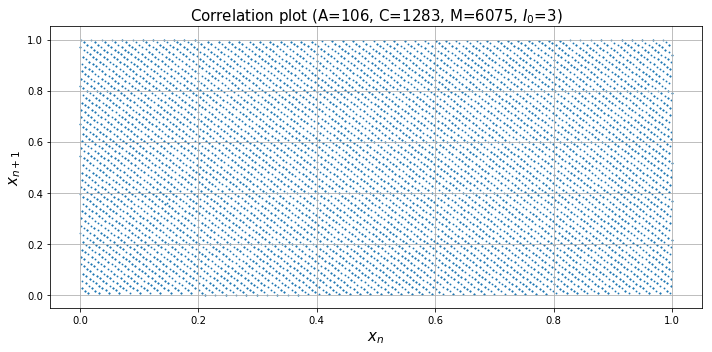

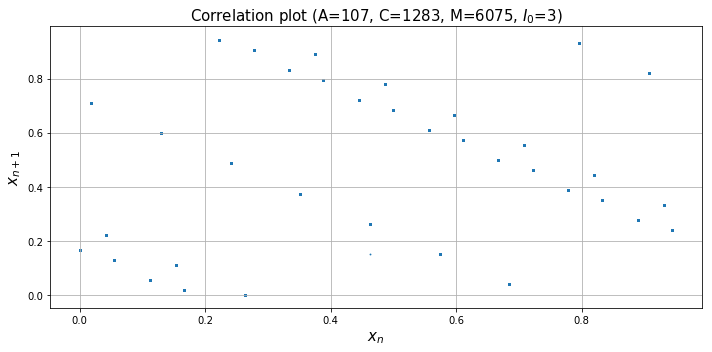

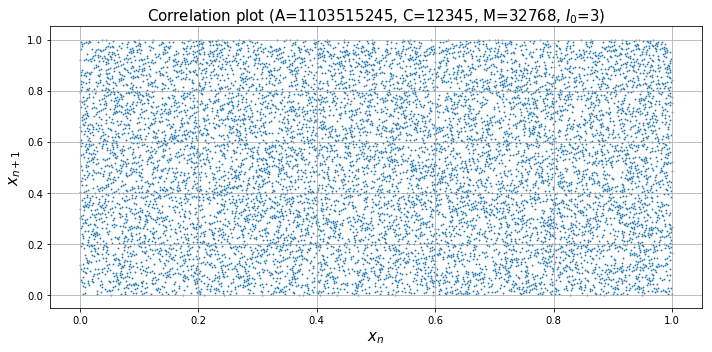

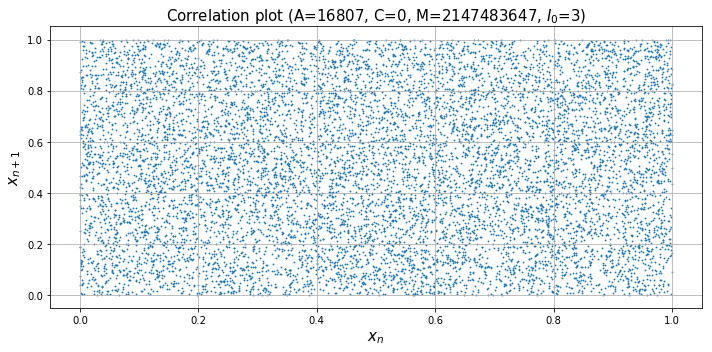

In [81]:
# correlation plots

plot_correlation(106,1283,6075,3)
plot_correlation(107,1283,6075,3)
plot_correlation(1103515245,12345,32768,3)
plot_correlation(16807,0,2**31-1,3)

## Time domain representation and autocorrelation plots

###  Linear congruential random number generator

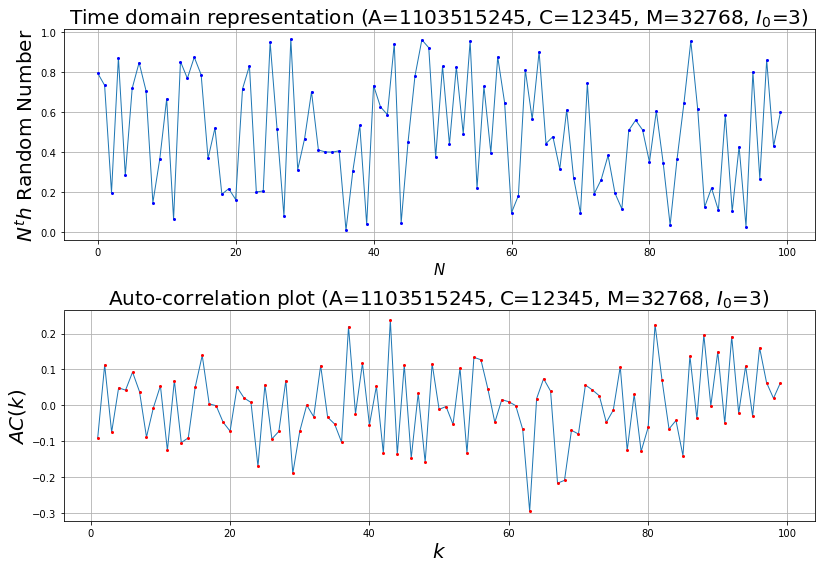

In [82]:
A =1103515245
C = 12345
M = 32768
I0 = 3

LCM(A, C, M, I0)

plot_TDR_autocorrelation(LCM, ' (A={}, C={}, M={}, $I_0$={})'.format(A,C,M,I0))

### Numpy.random.rand

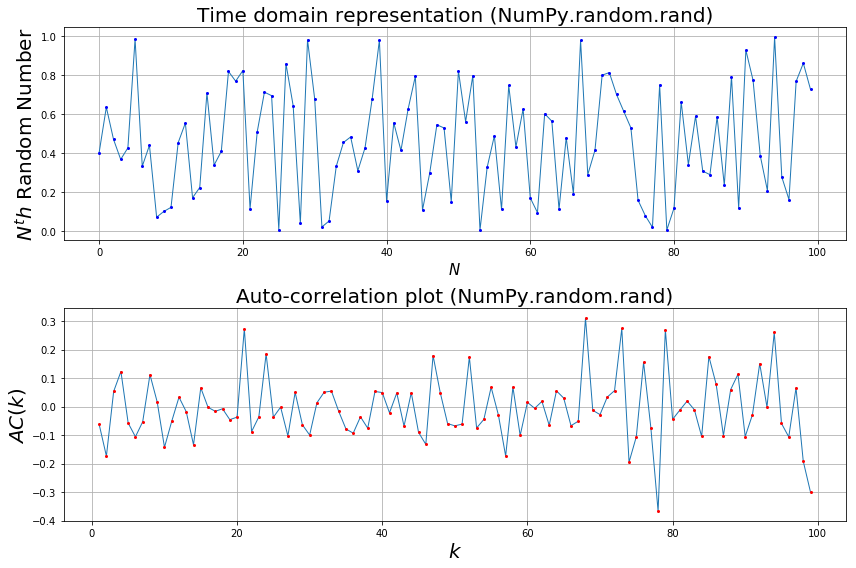

In [84]:
plot_TDR_autocorrelation(np.random.rand, ' (NumPy.random.rand)'.format(A,C,10,3))

## Fortran srand

In [8]:
# write functions to interface Fortran srand with python
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [99]:
%%fortran
   subroutine fortran_srand(z)
        integer, intent(out) :: z(1)
        !integer,parameter :: seed = 86456
                
        !call srand()
        z = irand()
        
   end subroutine

In [100]:
def call_fortran_srand():
    '''
    Calls Fortan srand and returns a pseudo random number
    '''
    return fortran_srand()[0]

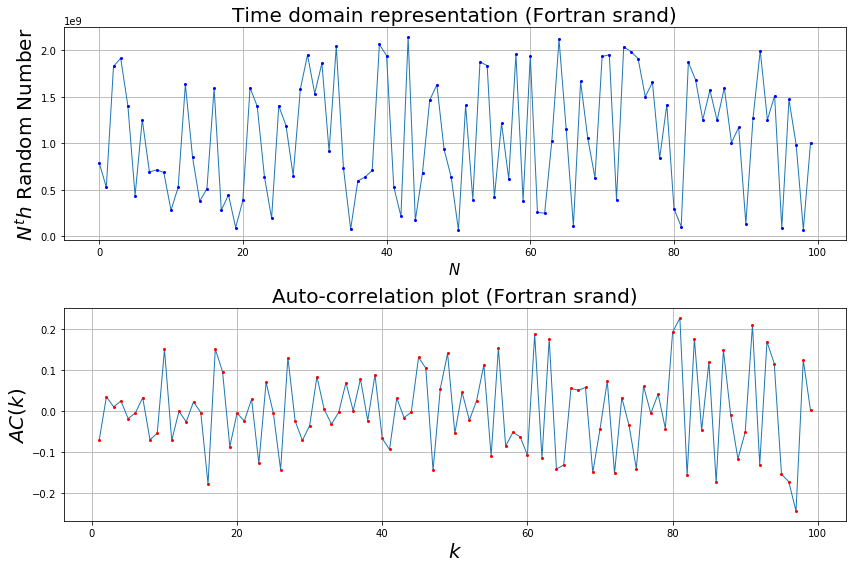

In [101]:
plot_TDR_autocorrelation(call_fortran_srand, ' (Fortran srand)')